In [37]:
using FFTW, Plots, NAJ, LaTeXStrings

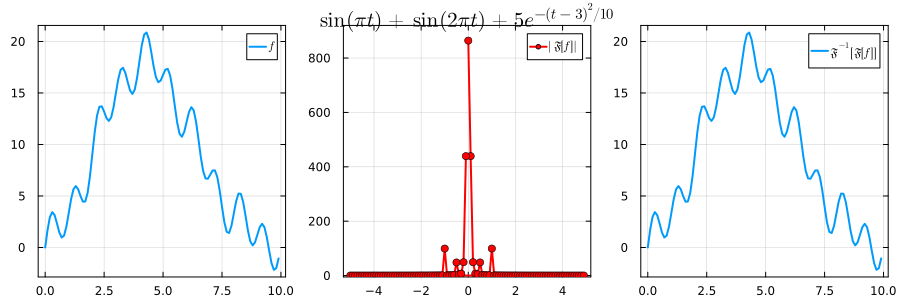

In [59]:
dt=0.1
t = 0:dt:9.95
y = sin.(1*π* t) + 2* sin.(2*π * t) .+ 5.0 .* t .* exp.(-(t.-3.0).^2 ./(10.0))
p1 = plot(t, y, label = L"f", lw=2, size=(600, 300), frame = :box)
fy1 = fft(y)
freq = fftfreq(length(t), 10)
u = (1:length(y))*2*π
p2 = plot(freq, abs.(fy1), marker = :circle, color=:red, lw=2, ylim=(-5, 920), size=(600, 300), frame = :box, label = L"|\mathfrak{F}[f]|", title = L"\sin (\pi t) + \sin (2 \pi t) + 5 e^{-(t-3)^2/10}")
p3 = plot(t,real.(ifft(fy1)), lw=2, frame = :box, label = L"\mathfrak{F}^{-1}[\mathfrak{F}[f]]")
plot(p1, p2, p3, layout = (1, 3), size=(900, 300))



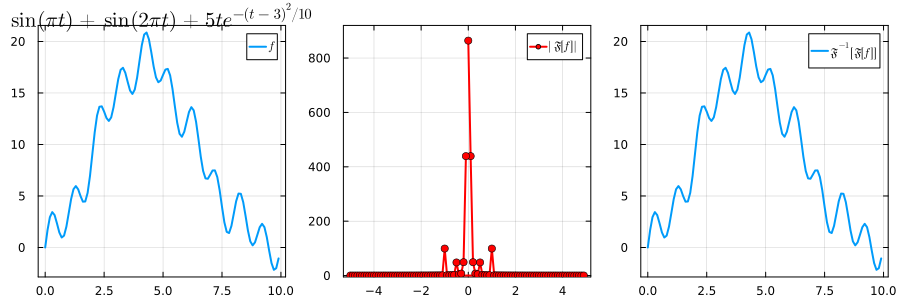

In [58]:
dt=0.1
t = 0:dt:9.95
y = sin.(1*π* t) + 2* sin.(2*π * t) .+ 5.0 .* t .* exp.(-(t.-3.0).^2 ./(10.0))
p1 = plot(t, y, label = L"f", lw=2, size=(600, 300), frame = :box, title = L"\sin (\pi t) + \sin (2 \pi t) + 5t e^{-(t-3)^2/10}")
fy1 = dft(y)
freq = fftfreq(length(t), 10)
u = (1:length(y))*2*π
p2 = plot(freq, abs.(fy1), marker = :circle, color=:red, lw=2, ylim=(-5, 920), size=(600, 300), frame = :box, label = L"|\mathfrak{F}[f]|")
p3 = plot(t,real.(idft(fy1)), lw=2, frame = :box, label = L"\mathfrak{F}^{-1}[\mathfrak{F}[f]]")
plot(p1, p2, p3, layout = (1, 3), size=(900, 300))

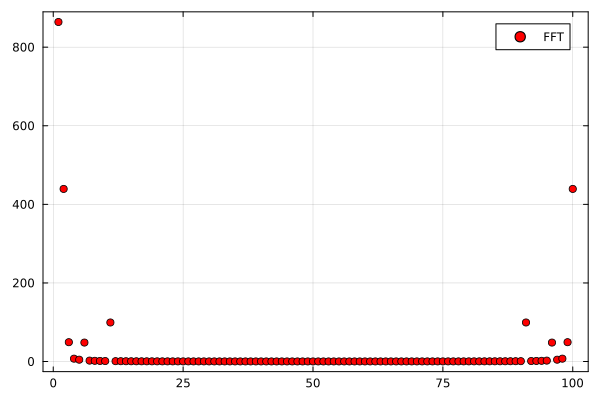

In [45]:
p2 = scatter((1:length(y)), abs.(fy1), color=:red, frame = :box, label = "FFT")

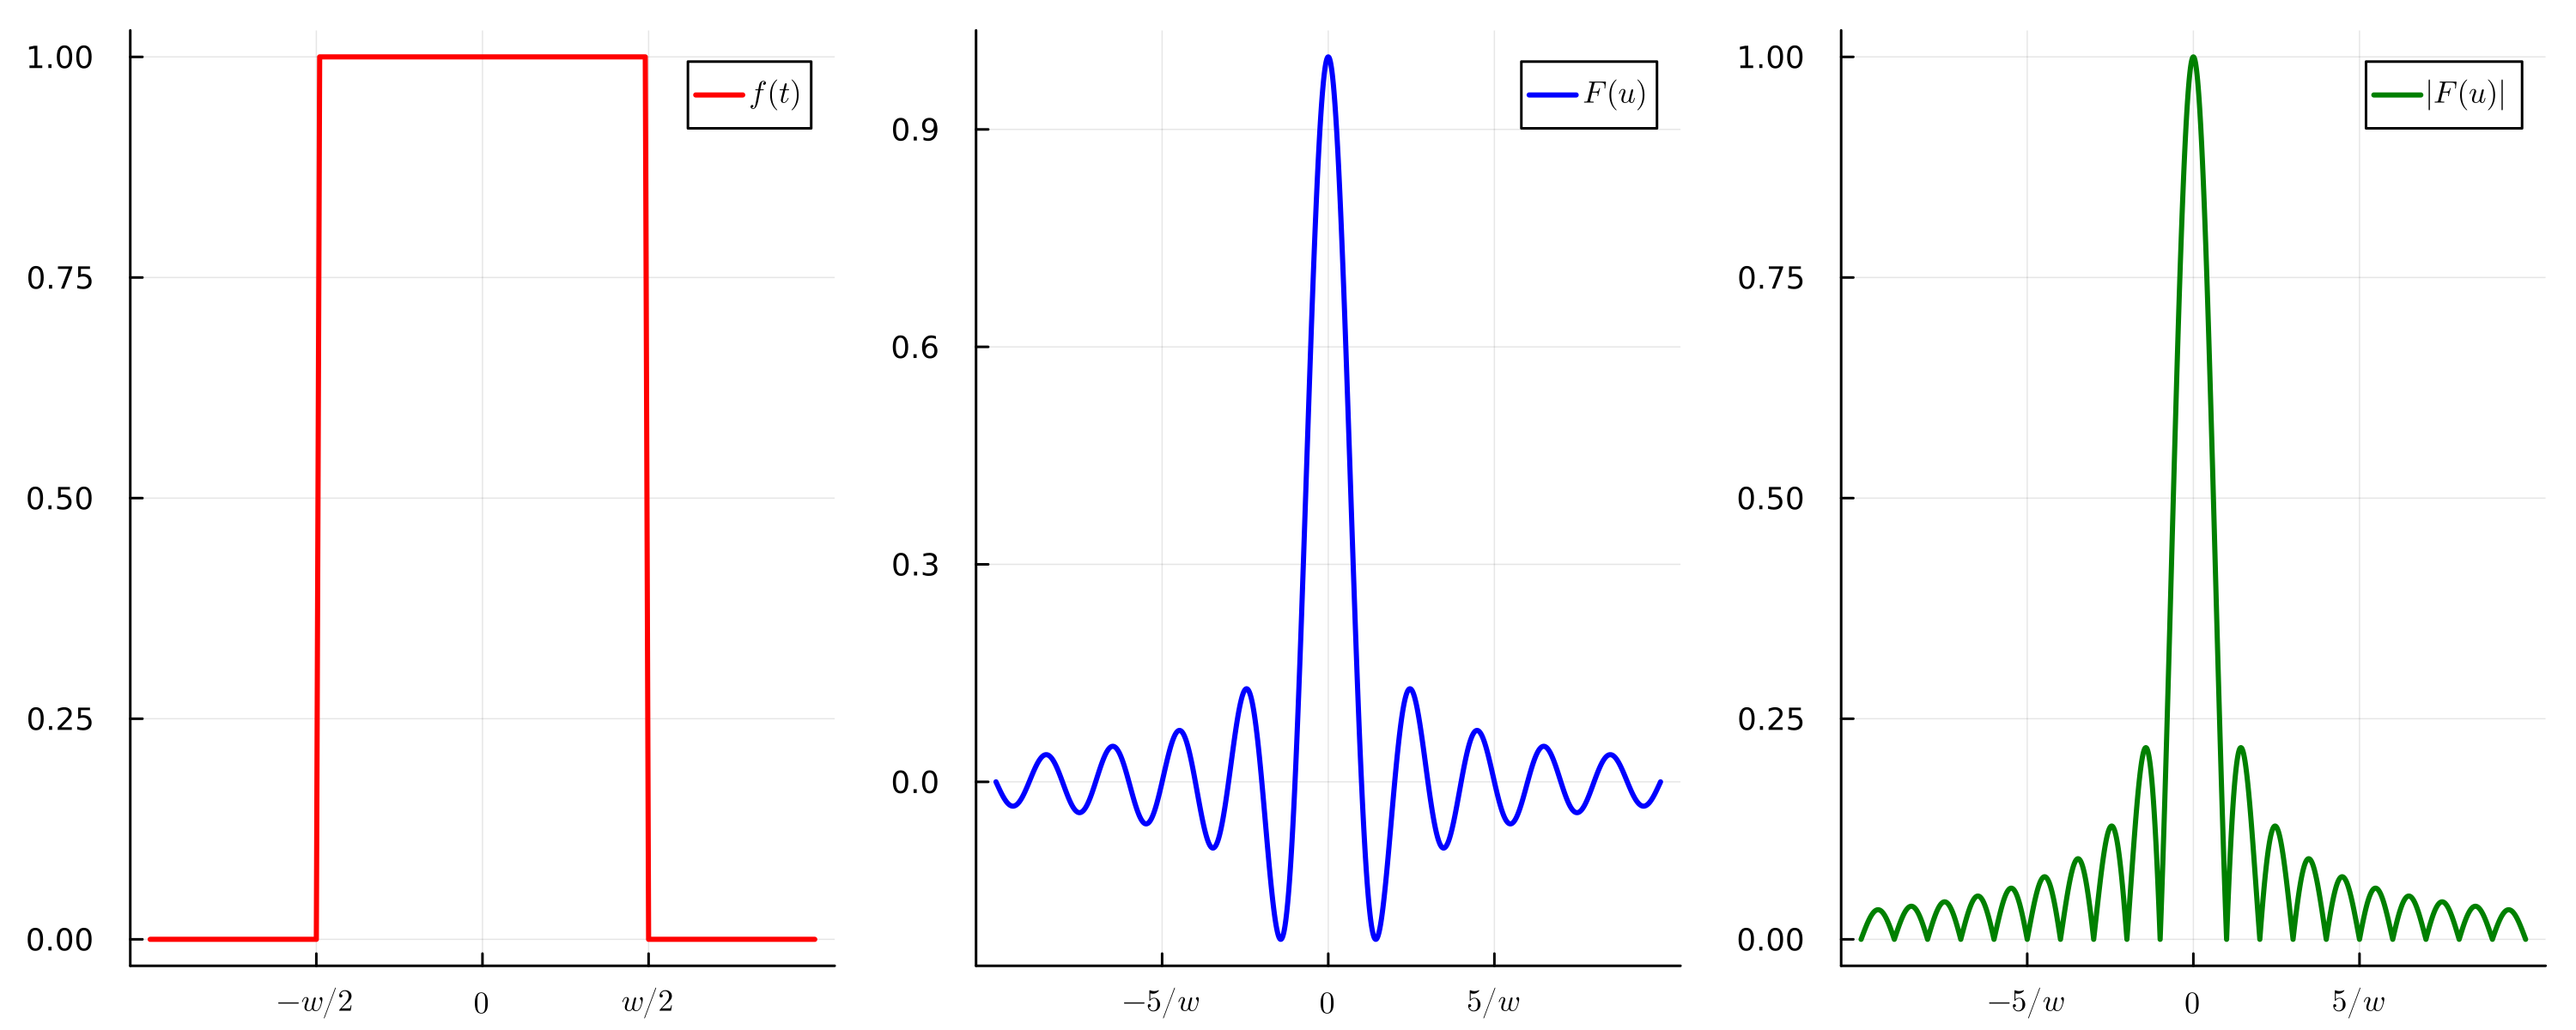

In [5]:
function four_rect(u)
    if abs(u)<1.0e-10
        return one(u)
    else
        return sin(π * u )/(π * u)
    end
end
t = -1:0.01:1
f = zeros(length(t))
f[abs.(t).<0.5] .= 1.0
p1=plot(t, f, xticks =([-0.5, 0, 0.5], [L"-w/2", L"0", L"w/2"]), lw=2, lc=:red, label = L"f(t)")
t2 = -10:0.01:10
p2 = plot(t2, four_rect.(t2), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :blue, lw=2, label = L"F(u)")
p3 = plot(t2, abs.(four_rect.(t2)), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :green, lw=2, label = L"|F(u)|")


plot(p1, p2, p3, layout=(1, 3), size = (1000, 400), dpi=300)

#savefig("fourier_of_rect.png")

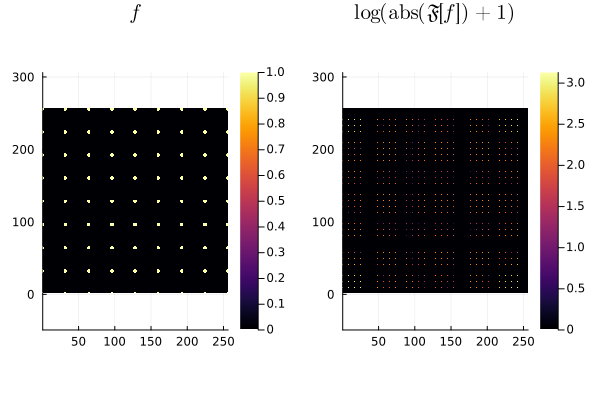

In [18]:
A= zeros(Float64, (256, 256))
for x ∈ 1:256, y ∈ 1:256
    xp, yp = 32*round(x/32), 32*round(y/32)
    if (x-xp)^2 + (y-yp)^2 < 8
        A[x, y] = 1.0
    end
end

p1=heatmap(A, aspect_ratio = :equal, size=(600, 400), title= L"f")
Af = fft(A)
p2 = heatmap(log10.(abs.(Af) .+ 1.0), aspect_ratio = :equal, size= (600, 400), title = L"\log (\textrm{abs}(\mathfrak{F}[f]) +1)")

plot(p1, p2)


In [169]:
x, y =825, 769
p, yp = 64*round(x/64), 64*round(y/64)

(832.0, 768.0)

In [174]:
extrema(abs.(Af))

(0.0, 11520.0)

In [ ]:
fft([1,1,1,1,1])

In [ ]:
ifft(fft([0,0,1,0,0]))

In [ ]:
ifft(fft([1,0,0,0,0]))

In [48]:
length(t)

100